## Loading the data


Loading the data from the CSV file into a pandas DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv('/heart_disease.csv')
display(df.head())

,age,gender,smoking_status,systolic_bp,cholesterol,diabetes,chest_pain_type,heart_disease
0,49,Male,Former,101,259,Yes,Atypical Angina,0
1,75,Female,Current,102,231,No,Asymptomatic,0
2,68,Male,Current,138,232,No,Typical Angina,0
3,48,Male,Former,93,252,Yes,Atypical Angina,0
4,46,Male,Former,123,198,No,Typical Angina,0


## EDA


Analyze the data to understand its structure, distribution, and relationships between variables.


In [2]:
df.info()
print('\nMissing values:')
display(df.isnull().sum())
print('\nDescriptive statistics for numerical columns:')
display(df.describe())
print('\nDescriptive statistics for categorical columns:')
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   age              100000 non-null  int64 
 1   gender           100000 non-null  object
 2   smoking_status   100000 non-null  object
 3   systolic_bp      100000 non-null  int64 
 4   cholesterol      100000 non-null  int64 
 5   diabetes         100000 non-null  object
 6   chest_pain_type  100000 non-null  object
 7   heart_disease    100000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB

Missing values:


,0
age,0
gender,0
smoking_status,0
systolic_bp,0
cholesterol,0
diabetes,0
chest_pain_type,0
heart_disease,0



Descriptive statistics for numerical columns:


,age,systolic_bp,cholesterol,heart_disease
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,52.489660,134.579790,224.541140,0.389120
std,13.865704,25.907508,43.251225,0.487553
min,29.000000,90.000000,150.000000,0.000000
25%,40.750000,112.000000,187.000000,0.000000
50%,53.000000,135.000000,224.000000,0.000000
75%,65.000000,157.000000,262.000000,1.000000
max,76.000000,179.000000,299.000000,1.000000



Descriptive statistics for categorical columns:


,gender,smoking_status,diabetes,chest_pain_type
count,100000,100000,100000,100000
unique,2,3,2,4
top,Male,Current,No,Atypical Angina
freq,50007,33656,50090,25190


## Vizualization


Visualize the distribution of key features and the target variable, and explore the relationships between features and the target variable.


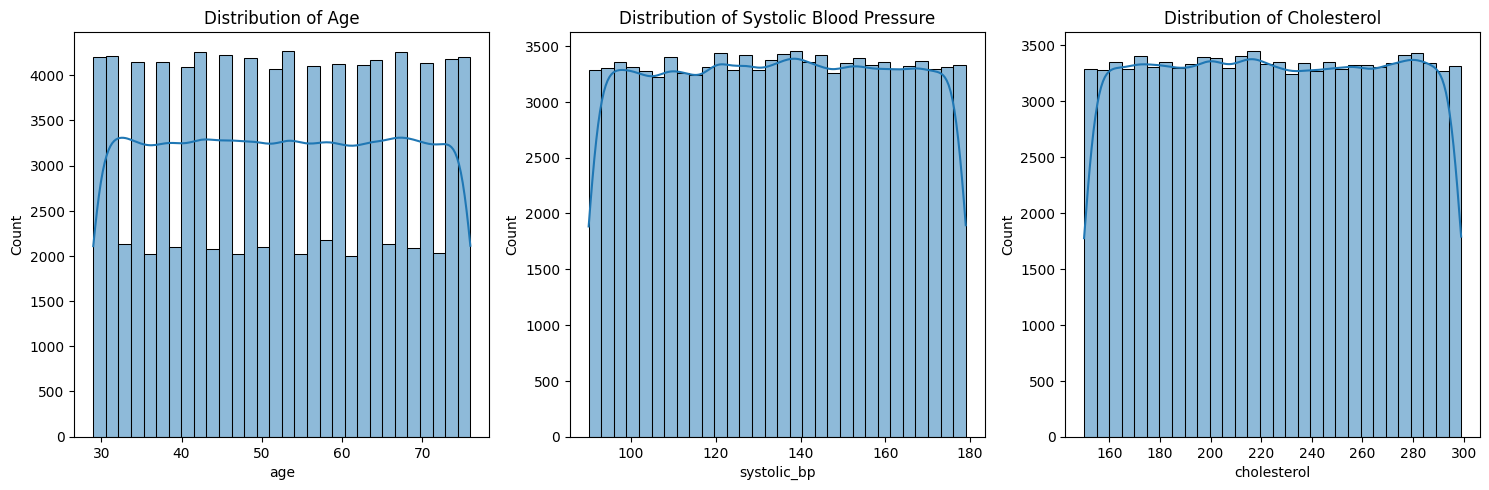

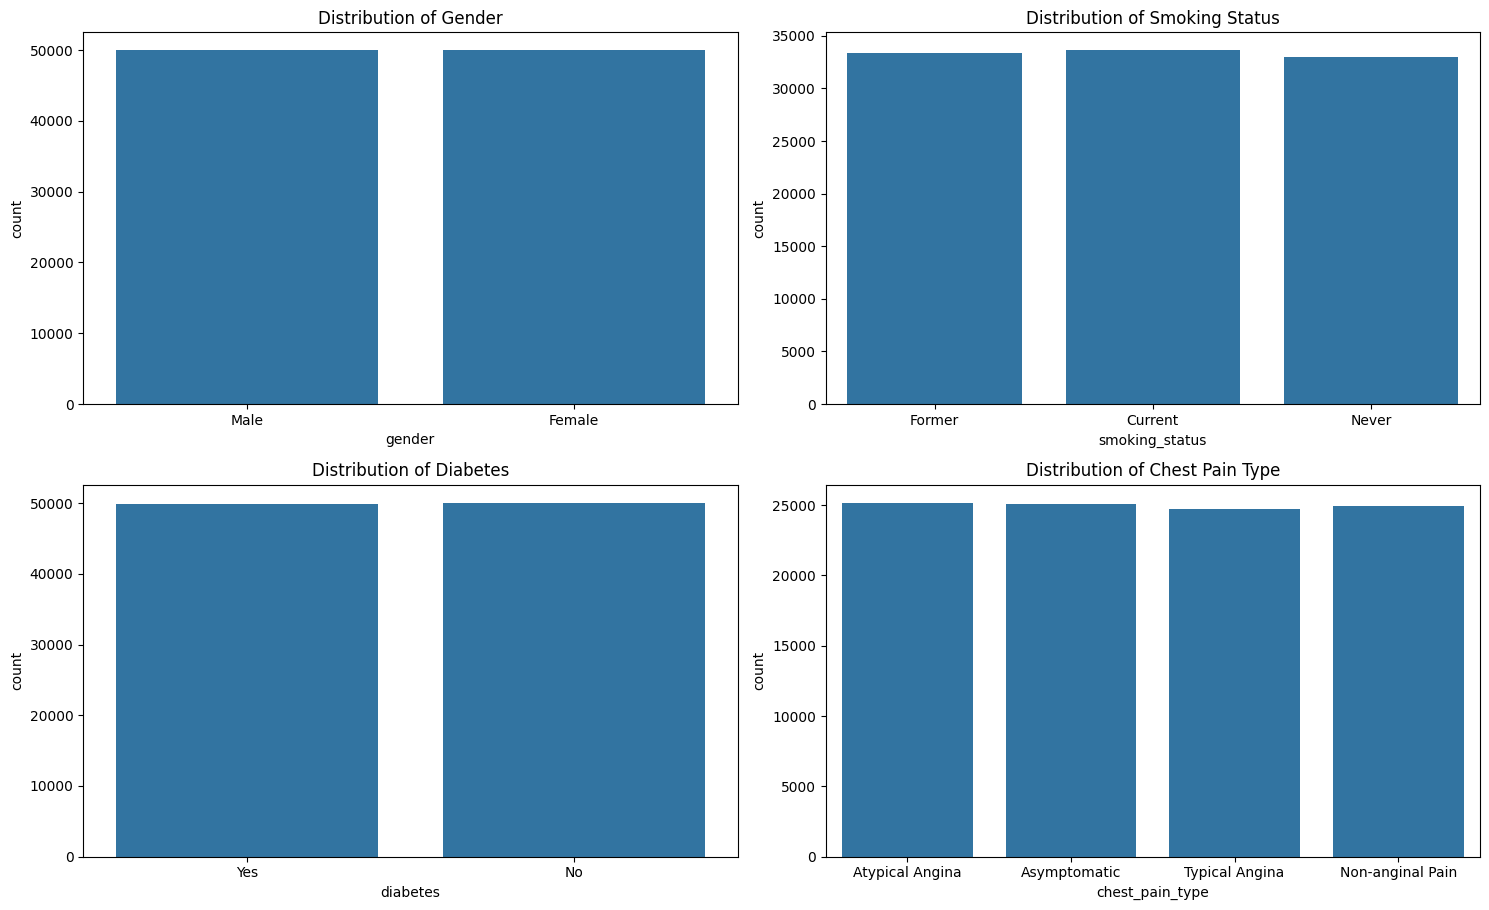

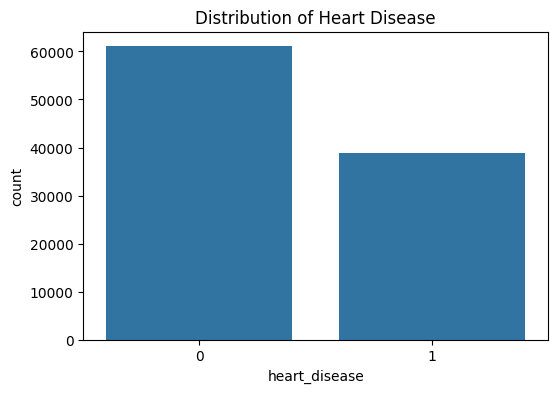

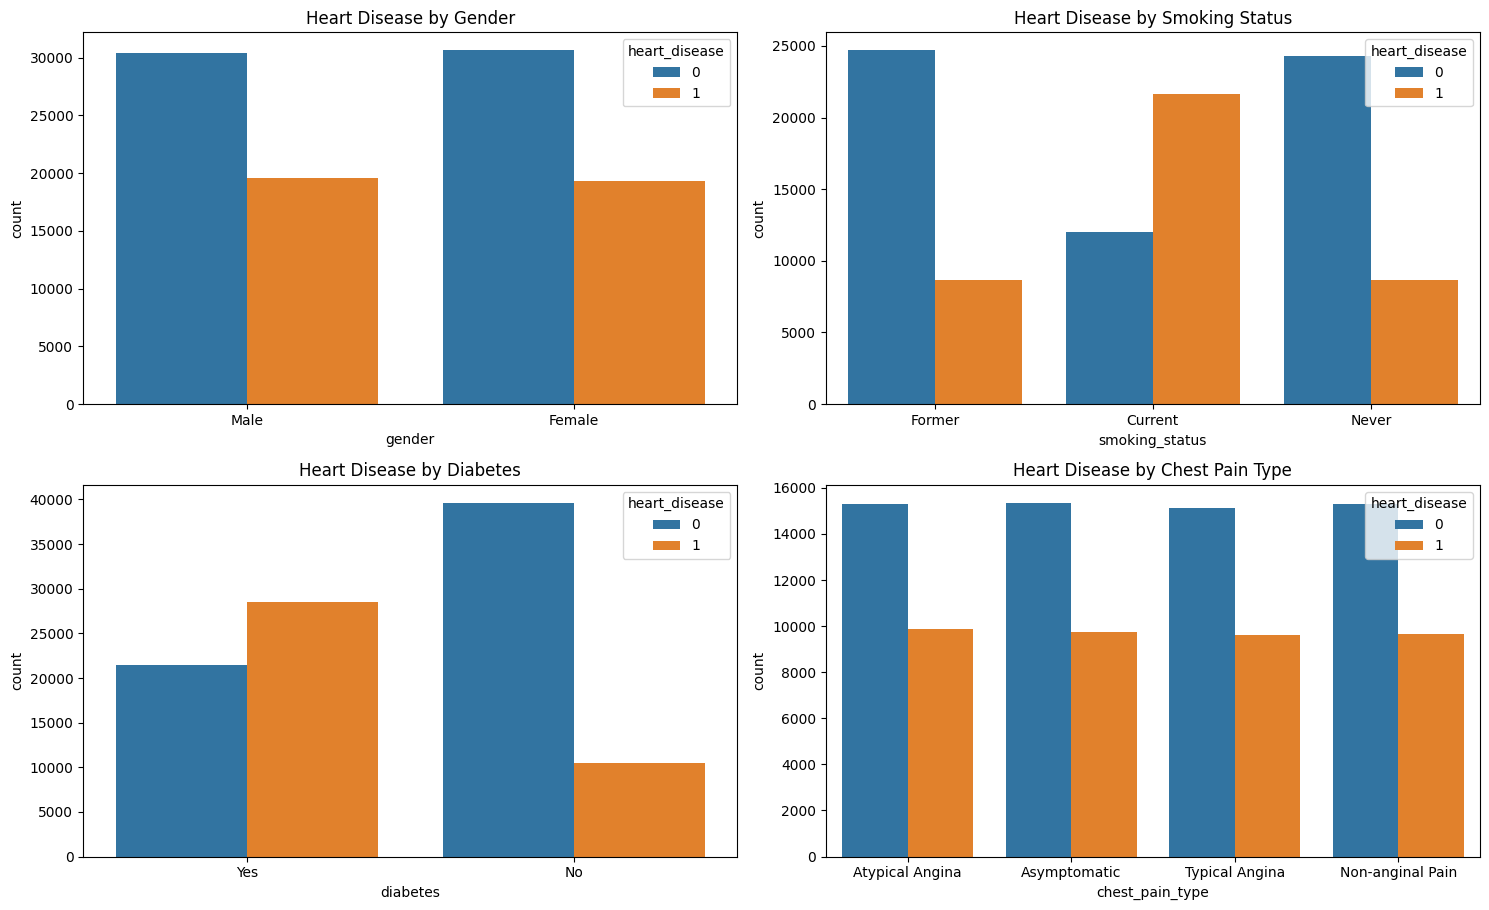

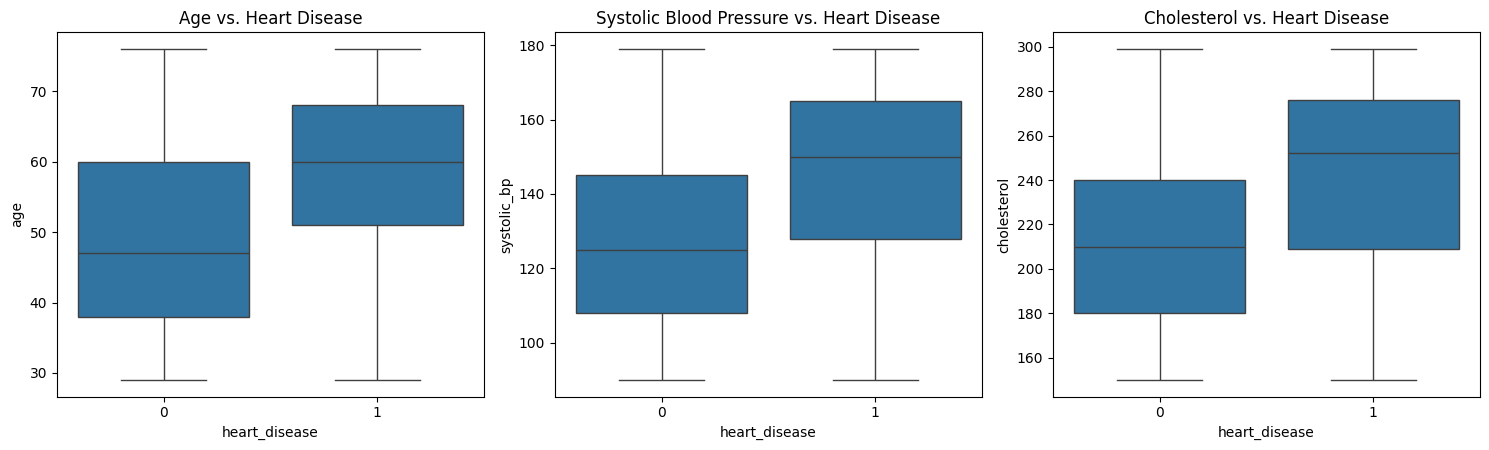

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 10))

# 1. Histograms for numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(df['systolic_bp'], kde=True, bins=30)
plt.title('Distribution of Systolic Blood Pressure')

plt.subplot(2, 3, 3)
sns.histplot(df['cholesterol'], kde=True, bins=30)
plt.title('Distribution of Cholesterol')

# Adjust layout for numerical plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Set figure size for categorical plots
plt.figure(figsize=(15, 10))

# 2. Count plots for categorical columns
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='smoking_status')
plt.title('Distribution of Smoking Status')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='chest_pain_type')
plt.title('Distribution of Chest Pain Type')

# Adjust layout for categorical plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 3. Count plot for the target variable 'heart_disease'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='heart_disease')
plt.title('Distribution of Heart Disease')
plt.show()

# 4. Count plots for categorical features vs. target variable
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender', hue='heart_disease')
plt.title('Heart Disease by Gender')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='smoking_status', hue='heart_disease')
plt.title('Heart Disease by Smoking Status')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='diabetes', hue='heart_disease')
plt.title('Heart Disease by Diabetes')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='chest_pain_type', hue='heart_disease')
plt.title('Heart Disease by Chest Pain Type')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Box plots for numerical features vs. target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='heart_disease', y='age')
plt.title('Age vs. Heart Disease')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='heart_disease', y='systolic_bp')
plt.title('Systolic Blood Pressure vs. Heart Disease')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='heart_disease', y='cholesterol')
plt.title('Cholesterol vs. Heart Disease')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Preprocess the data


Handle missing values (if any), encode categorical variables, scale numerical features, and split the data into training and testing sets.


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable from numerical columns for scaling
numerical_cols.remove('heart_disease')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# 2. Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

# 3. Initialize a StandardScaler and fit it to the numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 4. Transform the numerical features using the fitted StandardScaler (done in step 3)
display(df_encoded.head())

# 5. Concatenate the scaled numerical features and the one-hot encoded categorical features (done in step 2 and 3)
# The scaled numerical features are already part of df_encoded

# 6. Separate the features (X) and the target variable (y)
X = df_encoded.drop('heart_disease', axis=1)
y = df_encoded['heart_disease']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# 7. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Numerical columns: ['age', 'systolic_bp', 'cholesterol']
Categorical columns: ['gender', 'smoking_status', 'diabetes', 'chest_pain_type']


,age,systolic_bp,cholesterol,heart_disease,gender_Male,smoking_status_Former,smoking_status_Never,diabetes_Yes,chest_pain_type_Atypical Angina,chest_pain_type_Non-anginal Pain,chest_pain_type_Typical Angina
0,49,101,259,0,True,True,False,True,True,False,False
1,75,102,231,0,False,False,False,False,False,False,False
2,68,138,232,0,True,False,False,False,False,False,True
3,48,93,252,0,True,True,False,True,True,False,False
4,46,123,198,0,True,True,False,False,False,False,True


,age,systolic_bp,cholesterol,heart_disease,gender_Male,smoking_status_Former,smoking_status_Never,diabetes_Yes,chest_pain_type_Atypical Angina,chest_pain_type_Non-anginal Pain,chest_pain_type_Typical Angina
0,-0.251677,-1.296148,0.796718,0,True,True,False,True,True,False,False
1,1.623463,-1.257549,0.149334,0,False,False,False,False,False,False,False
2,1.118617,0.132017,0.172455,0,True,False,False,False,False,False,True
3,-0.323798,-1.604940,0.634872,0,True,True,False,True,True,False,False
4,-0.468039,-0.446969,-0.613654,0,True,True,False,False,False,False,True



Features (X) shape: (100000, 10)
Target (y) shape: (100000,)

X_train shape: (80000, 10)
X_test shape: (20000, 10)
y_train shape: (80000,)
y_test shape: (20000,)


## Select and train a model


Choose an appropriate machine learning model for classification and train it on the training data.


In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate the model


Assess the performance of the trained model using appropriate metrics.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9012
Precision: 0.8794
Recall: 0.8691
F1-score: 0.8742
ROC AUC Score: 0.9698


## Suggesting the best model

Based on the evaluation results, the best model for the given task.


In [7]:
print("Evaluation Metrics for Logistic Regression Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nModel Suggestion:")
print("The Logistic Regression model achieved an accuracy of {:.4f}, a precision of {:.4f}, a recall of {:.4f}, an F1-score of {:.4f}, and a ROC AUC score of {:.4f} on the test set.".format(accuracy, precision, recall, f1, roc_auc))
print("These metrics indicate that the model performs reasonably well in predicting heart disease.")
print("The precision and recall values suggest a good balance between correctly identifying positive cases and avoiding false positives.")
print("The F1-score, which is the harmonic mean of precision and recall, also supports this observation.")
print("The ROC AUC score, being close to 1, indicates that the model has a good ability to distinguish between the positive and negative classes.")
print("\nHowever, depending on the specific requirements and the acceptable level of risk for false positives and false negatives in a medical context, further exploration of other models (e.g., Random Forest, Gradient Boosting) and hyperparameter tuning might be beneficial to potentially improve performance, especially recall, if minimizing false negatives is critical.")

Evaluation Metrics for Logistic Regression Model:
Accuracy: 0.9012
Precision: 0.8794
Recall: 0.8691
F1-score: 0.8742
ROC AUC Score: 0.9698

Model Suggestion:
The Logistic Regression model achieved an accuracy of 0.9012, a precision of 0.8794, a recall of 0.8691, an F1-score of 0.8742, and a ROC AUC score of 0.9698 on the test set.
These metrics indicate that the model performs reasonably well in predicting heart disease.
The precision and recall values suggest a good balance between correctly identifying positive cases and avoiding false positives.
The F1-score, which is the harmonic mean of precision and recall, also supports this observation.
The ROC AUC score, being close to 1, indicates that the model has a good ability to distinguish between the positive and negative classes.

However, depending on the specific requirements and the acceptable level of risk for false positives and false negatives in a medical context, further exploration of other models (e.g., Random Forest, Gradie

## Summary:

### Data Analysis Key Findings

*   The dataset contains 100,000 entries and 8 columns, with no missing values.
*   The dataset includes three numerical columns (`age`, `systolic_bp`, `cholesterol`) and four categorical columns (`gender`, `smoking_status`, `diabetes`, `chest_pain_type`).
*   One-hot encoding was applied to the categorical columns, and numerical features were scaled using `StandardScaler`.
*   The data was split into training (80,000 entries) and testing (20,000 entries) sets.
*   A Logistic Regression model was trained on the preprocessed data.
*   The trained Logistic Regression model achieved the following performance metrics on the test set:
    *   Accuracy: 0.9012
    *   Precision: 0.8794
    *   Recall: 0.8691
    *   F1-score: 0.8742
    *   ROC AUC Score: 0.9698

### Insights

*   The Logistic Regression model demonstrates a good balance between correctly identifying positive cases and minimizing false positives, with a strong ability to distinguish between classes as indicated by the high ROC AUC score.
*   Depending on the specific requirements regarding false negatives, exploring alternative models (e.g., Random Forest, Gradient Boosting) and hyperparameter tuning could potentially enhance model performance, particularly recall.
